# Math 761: Midterm
## Sequoia Andrade

# Problem 1

Use A/R to sample 5,000 Points from $f(x) = \frac{5}{132}(-\frac{x^4}{27}+\frac{4x^3}{9}-\frac{7x^2}{3}+6x)$ for $0\leq x \leq 6$. Plot sample points as a histogram along with $f(x)$.

## Solution

To use A/R method, first an envelope distribution $cg(x)$ must be chosen. In this case, I choose the envelope where $g(x) = uniform(0,6)$ and $c=0.23$ since the max of $f(x)$ on the support of $0\leq x \leq 6$ is approximately $0.227$. Then we can sample from $f(x)$ by sampling from $g(x)$ and $u\sim uniform(0,6)$ and accepting samples $x_i$ such $u_i<\frac{f(x_i)}{cg(x_i)}$. This is performed until 5000 samples are accepted, resulting in the distribution below.

In [1]:
f = function(x){
    y = (5/132)*((-(x^4)/27)+(4*(x^3)/9)-(7*(x^2)/3)+6*x)
    return (y)
}

x_ax = seq(from=0, to=6, length.out=1000)
max(f(x_ax)) # calculate maximum of target function

[1] 0.2272726

In [2]:
set.seed(3)
n = 5000
accept = rep(NA, n)
c = 0.23
j = 1
while(j < n) {
    test_u = runif(1, 0, 6) # draw from u
    x = runif(1, 0, 6) # draw x from g(x)
    test_fx_cgx = f(x)/(c*dunif(x, 0, 6)) # get test metric
    if (test_u <= test_fx_cgx) { # check acceptance criteria
        accept[j] = x
        j = j+1
    }
}


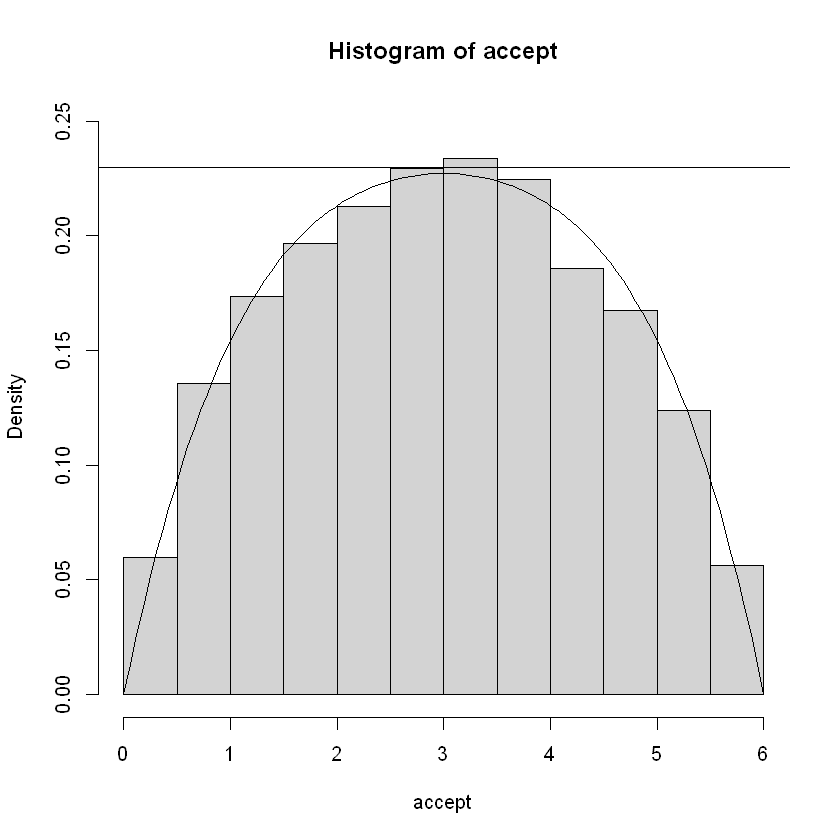

In [3]:
hist(accept, prob=TRUE, breaks=15, ylim=c(0, 0.25))
curve(f, x_ax, xlim=c(0,6), add=TRUE)
abline(h=0.23)

# Problem 2

If we instead define the pseudoinverse for the inverse transformation method as sup {${X: F(x)\leq u }$} where is the first place that the proof breaks down? why? you can also try to give an intuitive reason for why this is a bad definition of the psudoinverse for the inverse transformation method.

## Solution
Intuitively, defining the inverse transformation method as  sup {${X: F(x)\leq u }$} is a bad idea for the discrete case as it would give infity in some cases and it would be difficult to find the exact sup for most cases. Additionally, this would remove right continutity. For example, with the distribution with $x={0,1,2}$ and $p(0)=0.2, p(1)=0.4, \text{ and } p(2)=0.2$, then the CDF would be:

$$F(x) = \begin{cases}
0.2 & 0\leq x<1\\
0.6 & 1\leq x<2\\ 
1 & 2<x\\
\end{cases}$$

If we use the supremum in the psuedoinverse, then the inverse CDF could become (I think):

$$F^{-1}(u) = \begin{cases}
0.99999999999 & 0 \leq u \leq 0.2 \\
1.99999999999 & 0.2 < u \leq 0.6\\ 
\infty & 0.6< u \leq 1 \\
\end{cases}$$

A core part of the proof is showing that if the transformation we take is $Y=F^{-1}(u)$, then we need to show $F_y(x) = F_x(x)$. We do this by showing $F_x(x) \geq u \iff F^{-1}(u) \leq x$. 
The proof starts to break down when trying to show that $F_x(x)\geq u \to F^{-1}(u) \leq x$, since this no longer holds true when using the supremum. Specifically, $F_x(x)\geq u$ implies ${x \in \{X: F(x)\leq u \} }$, so x is in the set, but since we take the supremum of the set we are not guarenteed that $ F^{-1}(u) \leq x$. If we use the example distribution above with $x=0.5$, then $F(x) = 0.2$, but $F^{-1}(0.2) = 0.99999$, which is greater than x.


# Problem 3

We wish to estimate:
$$\int_0 ^\infty x(\frac{x}{2})^3 e ^{-(x/2)^2+x}e^{-x}dx$$

using techniques from class, estimate the interal by sampling 10,000 times from:

a. An exponential distribution with $\lambda=1$

b. and $\frac{4}{3\pi (1+(x-1)^2)} \text{ for } x>0$

Run each estimator 100 times and draw a historgram of the 100 runs. Report the average estimate. Say which is more efficient and why.

## Solution

### A)
To sample using estimator a, we can use monte carlo integration and consider:
$$\theta = E_f[h(x)]=\int_{x} h(x)f(x)dx \approx \frac{\sum_i ^n h(x_i)}{n}$$

With $f(x) = e^{-x}$ and $h(x) = x(\frac{x}{2})^3 e ^{-(x/2)^2+x}$. We then sample from $f(x)$, substitute the samples into $h(x)$, then take the sample mean of $h(x)$.

Using this estimator with 10000 samples, over 100 runs the average estimator is 2.672 with a variance of 0.0037.

### B)
To sample using estimator b, we can use importance sampling and consider:

$$E_g[h(x)\frac{f(x)}{g(x)}]=\int_{x} h(x)f(x)\frac{g(x)}{g(x)}dx$$

Note that the integral target simplifies to $\int_0 ^\infty x(\frac{x}{2})^3 e ^{-(x/2)^2}dx$. Then we get $g(x) = \frac{4}{3\pi (1+(x-1)^2)}$, $h(x) = x(\frac{x}{2})^3$ and $f(x) = e^{-x^2/2}$. 

To sample $x_i \in g(x)$, we can use the inverse transformation method.

To do this, we first need to get the CDF:

$$G(x) = \int_0^s \frac{4}{3\pi (1+(s-1)^2)}ds =\frac{4}{3\pi}\int_0^s \frac{1}{1+(s-1)^2}ds$$

Using $u=s-1$ and $du=ds$:

$$G(x) =\frac{4}{3\pi}\int_0^s \frac{1}{1+u^2}du$$

$$\frac{4}{3\pi} (arctan(s-1)|_0^x) = \frac{4}{3\pi}(arctan(x-1)-arctan(-1))$$

Distributing and using $arctan(-1) = \frac{\pi}{4}$
$$G(x) =  \frac{4}{3\pi}arctan(x-1) +\frac{1}{3}$$

Then we get the inverse CDF:
$$ y =  \frac{4}{3\pi}arctan(x-1) +\frac{1}{3}$$
Solving for y:
$$tan((y - \frac{1}{3})\frac{3\pi}{4})+1=x$$

Then we get the inverse CDF:
$$G^{-1} (u) = tan((u - \frac{1}{3})\frac{3\pi}{4})+1$$
Samples are then taken from $u\sim Unif(0,1)$ and substituted into $G^-1(u)$ to get samples from $g(x)$.

Finally now that we have samples from $g(x)$, we can get the estimator using $E_g[h(x)\frac{f(x)}{g(x)}]= \frac{\sum_i^n h(x_i)\frac{f(x_i)}{g(x_i)}}{n}$.

Using this estimator with 10000 samples, over 100 runs the average estimator is 2.655 with a variance of 0.0017.

### Comparison

According to wolfram alpha, the correct estimate for the integral is $2.6587$, indicating both estimators have average values close to the true value ($\bar{\theta_1}=2.662, \bar{\theta_2=2.655}$). The second estimator performs better with an average closer to the true values. Additionally, the second estimator is more efficient compared to the first, with $var{\theta_1} = 0.0037$ and $var{\theta_2} = 0.0017$. The relative efficiecny of the second to the first is $\frac{0.0017}{0.0037} = 0.459$, indicating the second estimator is about twice as efficient as the first.

In [4]:
# a) 
h = function(x){ # define h(x)
    x2 = x/2
    y = x*(x2^3)*exp(-(x2^2)+x)
    return (y)
}

n = 10000
theta_1 = rep(NA, 100) # data storage
for (i in 1:100){
    x = rexp(n, 1) # sample from exp(1)
    h_x = h(x) # calculate h(x)
    theta_hat = mean(h_x) # get estimate
    theta_1[i] = theta_hat # store estimate
}

mean(theta_1)
var(theta_1)

[1] 2.671915

[1] 0.003708712

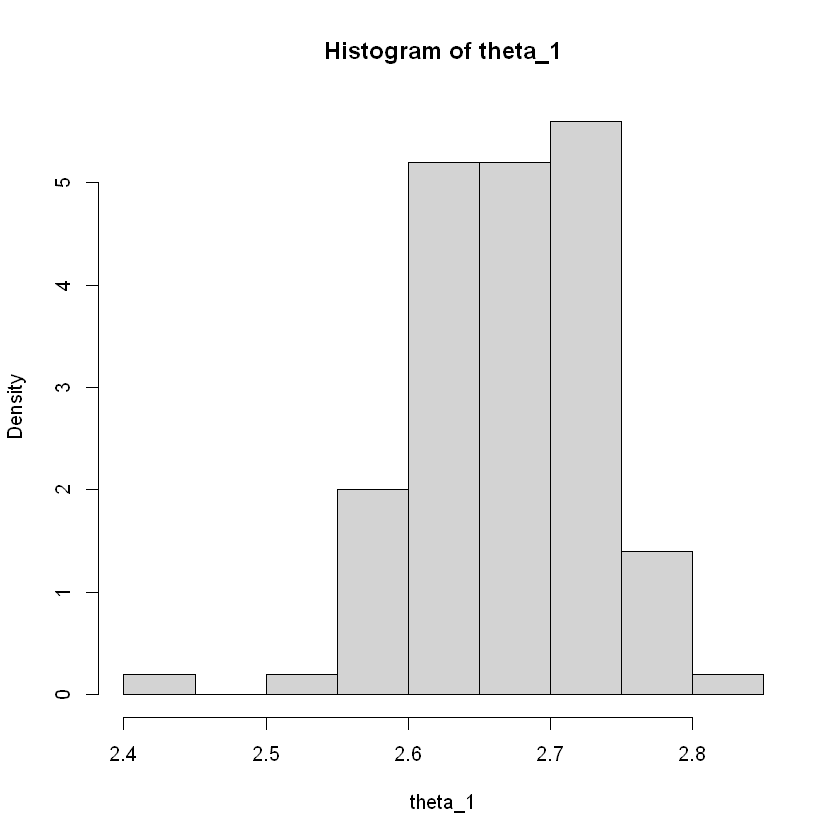

In [5]:
hist(theta_1, prob=TRUE)


In [6]:
# b)
g = function(x){ # g(x)
    s = x-1
    denom = 3*pi*(1+(s^2))
    y = 4/denom
    return (y)
}


inv_g = function(u){ # inverse of g(x)
    num = 3*pi*u - 1
    s = tan(num/4) +1
    return (s)
}

h = function(x){ # h(x)
    x2 = x/2
    y = x*(x2^3)
    return (y)
}

f = function(x){ # f(x)
    return((x>0)*exp(-((x/2)^2))) # filter for x>0
}

theta_2 = rep(NA, 100) # data storage

for (i in 1:100){
    u = runif(n, 0, 1) # sample from uniform
    X = inv_g(u) # substitute into inverse CDF to get sample from g(x)
    weights = (f(X))/g(X) # calculate weights
    theta = mean(weights*h(X)) # take weighted average
    theta_2[i] = theta
}

mean(theta_2)
var(theta_2)

[1] 2.655033

[1] 0.001718468

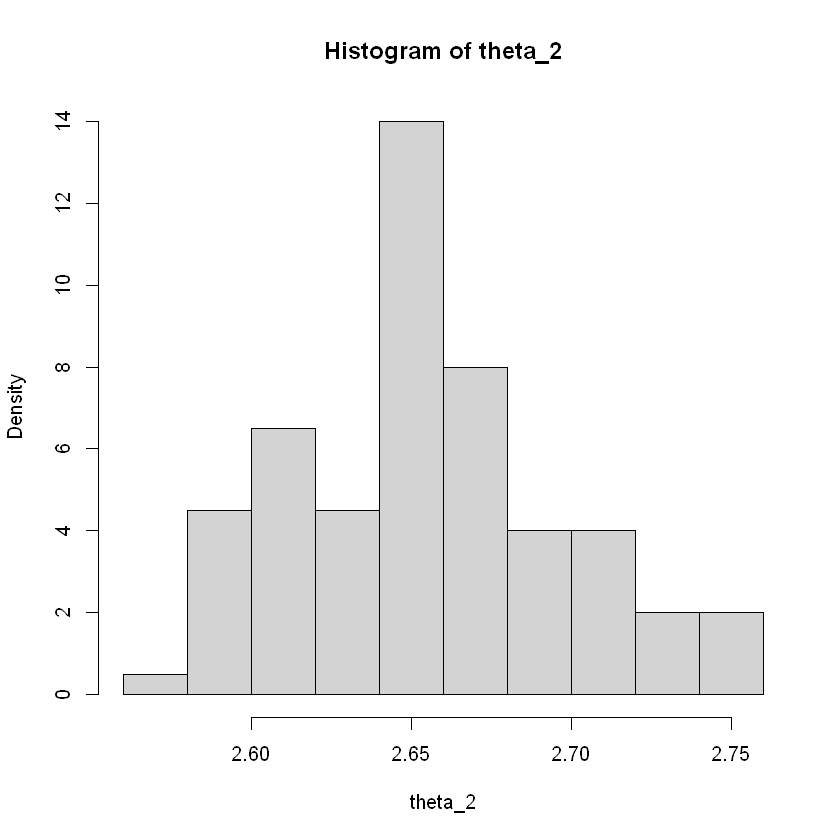

In [9]:
hist(theta_2, prob=TRUE)

# Problem 4

a. What are 2 uses of simulation?

b. Say you have numbers: 0.1, 0.4, 0.1, 0.5, 0.9, 0.2, 0.6, 0.5, 0.3, 0.4, 0.8, 0.9, 0.8. Check for (2,3)-equidistribution. Please show work.

c. Say that you have 5 data points and (instead of the sample average) the estimator of interest is $cos(\sum_i x_i)$. for your data points, the observed statistic is -1. You want to know if the data points came from a stantard normal distribution How could you test a hypothesis at the $\alpha =0.05$ level without knowing the distribution of $cos(\sum_i x_i)$? No code needed. Just describe the steps you would follow.

## Solution

a. Simulation can be used to perform hypothesis tests when theory (e.g., central limit theorem) does not apply. For example, you can use simulation to test the hypothesis that students sit randomly in a class room when you only have one sample. Simulation can also be used to generate samples from distributions, such as the uniform distribution. More complex simulation methods, such as acceptance/rejection sampling, can be used to sample from distributions we cannot sample from directly by simulating random numbers from distributions we can sample from and accepting samples based on acceptance criteria.

b. For (2,3)-equidistribution, we split $[0,1]$ into three bins, then check to see how many 2-tuples fall into each of the bins. This results in a 2-level tree, where each level has three branches from each node, resuling in a total of 9 bins. The resulting distribution is in the image below, with 4 counts in the $[0, 1/3), [1/3, 2/3)$ bin. From these distributions, we can see that the numbers are not (2,3)-equidistributed.

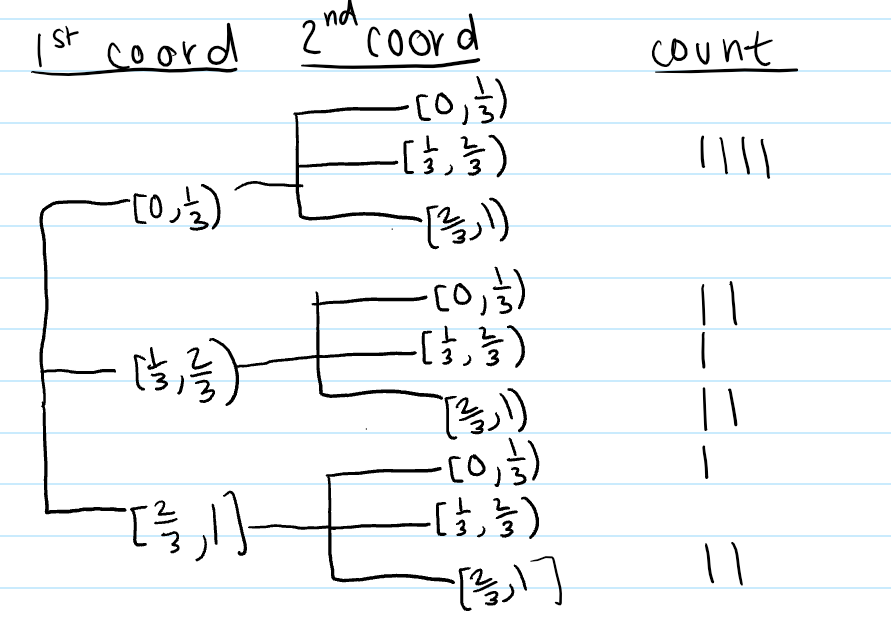

c. To test the hypothesis at the $\alpha=0.05$ level that data came from a standard normal distribution without knowing the distribution of $cos(\sum_i x_i)$, simulation can be used. First, set up the hypothesis test for $\mu=0$ since the standard normal is of interest:

$H_0:$ $X$ is distributed normally

$H_1:$ $X$ is not distributed normally

Next, we can randomly sample groups of $x_1, x_2, x_3, x_4, x_5 \sim N(0,1)$ and caluclate the test statistic, $cos(\sum_i x_i)$ a large number of times, say $n=1000$. 

We can get a p-value for the test statistic by calculating the proportion of the statistic that are as extreme as our sample, in this case $-1$, then multiply the proportion by two to get a two-sided test. To determine the direction to check for extremity, the mean of the $1000$  statistics can be compared to the sample statistic.

Finally to conlude, examine the p-value and the significance level. If the p-value is greater than $\alpha=0.05$, then we fail to reject the null hypothesis that the data is standard normally distributed. If the p-value is less than $\alpha=0.05$, then we reject the null hypothesis and have evidence that the data does not follow the standard normal distribution. 